# 결정트리 `Decision Tree`

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

wine = pd.read_csv('./wine.csv')

wine.info() # 6497 결측값 없음.
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [12]:
from sklearn.model_selection import train_test_split


# 데이터 분리
X = wine[['alcohol',	'sugar',	'pH']] # 이거 컬럼명 한 번씩 써준다는 의미에서 직접 쓰는 게 좋다.
y = wine['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)
X_train_s

array([[ 0.01376574,  0.4646116 , -0.16888369],
       [ 1.60871671, -0.70299854,  0.26967864],
       [ 1.10504798, -0.70299854,  1.20945505],
       ...,
       [-0.82568214,  0.0267578 ,  0.14437512],
       [-0.82568214,  0.52716215, -0.23153545],
       [-0.82568214, -0.57789745,  1.83597265]], shape=(5197, 3))

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_s, y_train)
print('훈련점수: ', lr.score(X_train_s, y_train))
print('테스트점수: ', lr.score(X_test_s, y_test))

print(lr.classes_)
lr.predict_proba(X_test_s[:5])

훈련점수:  0.7808350971714451
테스트점수:  0.7776923076923077
[0. 1.]


array([[0.00719047, 0.99280953],
       [0.45102444, 0.54897556],
       [0.03548978, 0.96451022],
       [0.02165133, 0.97834867],
       [0.01058485, 0.98941515]])

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state= 42)
dtc.fit(X_train_s, y_train)

print('훈련점수: ', dtc.score(X_train_s, y_train))
print('테스트점수: ', dtc.score(X_test_s, y_test))
# 요것도 과적합(모델이 너무 복잡하기 때문에)

print(dtc.classes_)
dtc.predict_proba(X_test_s[:5])


훈련점수:  0.996921300750433
테스트점수:  0.8592307692307692
[0. 1.]


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

0.3669367279393918


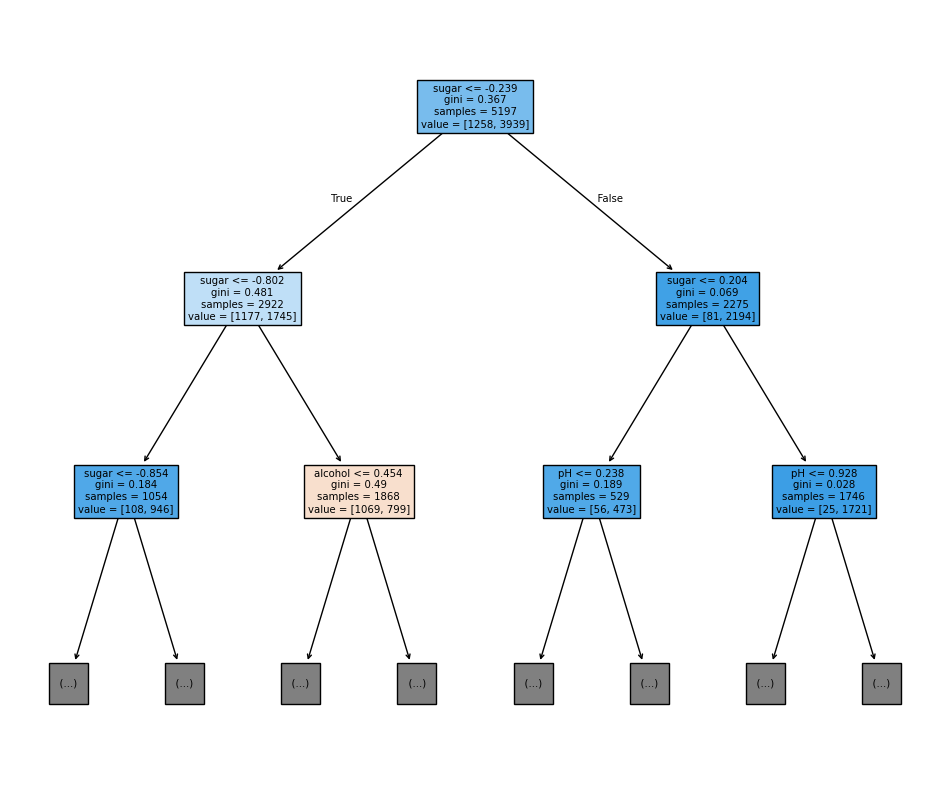

In [32]:
from sklearn.tree import plot_tree

# 지니불순도: 1 - (음성클래스비율^2 + 양성클래스비율^2)
gini = 1 - ((1258/5197)**2 + (3939/5197)**2)
print(gini)

plt.figure(figsize = (12, 10))
plot_tree(dtc, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 교차검증
- 조퇴 이슈

# 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV


GridSearchCV

In [35]:
from scipy.stats import uniform, randint
# scipy는 선형대수 전용 수치계산.
# uniform, randint -> 클래스 -> 주어진 범위에서 고르게 값을 뽑는다(균등분포)
# uniform: 범위 내 랜덤한 실수 추출
# randint: 범위 내 랜덤한 정수 추출
rgen = randint(0, 10) # 인스턴스 생성
rgen.rvs(10)

np.unique(rgen.rvs(1000), return_counts=True)

ugen = uniform(0, 1)
ugen.rvs(10)

array([0.2934983 , 0.83752437, 0.58706046, 0.76622691, 0.62559934,
       0.95416769, 0.74448693, 0.48952066, 0.41678655, 0.53247616])

In [37]:
params = {
    # 노드 분할을 위한 최소 불순도
    'min_impurity_decrease': uniform(0.0001, 0.001),
    # 트리 깊이
    'max_depth': randint(10, 50),
    # 노드를 나누기 위한 최소 샘플 수
    'min_samples_split': randint(2, 25),
    # 리프 노드 개수 최솟값
    'min_samples_leaf': randint(1, 25),
}

In [38]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    n_iter = 100,
    n_jobs = -1,
    random_state=42
    )

gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 31, 'min_impurity_decrease': np.float64(0.0003439896433790836), 'min_samples_leaf': 6, 'min_samples_split': 7}


In [40]:
gs.best_score_
dt = gs.best_estimator_

print(f'최종 테스트 결과: {dt.score(X_test, y_test)}')

최종 테스트 결과: 0.8592307692307692
